### Machine Learning

Jay Urbain, PhD

3/22/2017

References:

- Games, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) An Introduction to Statistical Learning
with applications in R, www.StatLearning.com, Springer-Verlag, New York. Chapter 4.

- [scikit-learn](http://scikit-learn.org/stable/)

In this notebook we will be applying logistic regression classification using *scikit-learn* to classify instances as likely or not likely to default using the *Credit Card Default* dataset.

Answer **questions** in the empty cell(s) below each question in the notebook. Here are the steps we will follow. 

1 - Importing the data

2 - The Logistic Function

3 - Getting, preparing, and visualizing the data

4 - Logistic Regression classification

5 - Evaluating the model on the training data

6 - Summary for applying Logistic Regression with scikit-learn

7 - Questions

Dataset: **Credit Card Default Data**

Description: A simulated data set containing information on ten thousand customers. The aim here is to predict which customers will default on their credit card debt. A data frame with 10000 observations on the following 4 variables:

- **default** A factor (binary categorical attribute) with levels (enumerated values) No and Yes indicating whether the customer defaulted on their debt.

- **student** A factor with levels No and Yes indicating whether the customer is a student.

- **balance** The average balance that the customer has remaining on their credit card after making
their monthly payment.

- **income** Income of customer

Install the following libraries if you have not already done so. 

[Searborn statistical](https://stanford.edu/~mwaskom/software/seaborn/) visualization library installation.

Use the conda package installing in a terminal window as follows:

conda install seaborn
    
[Statsmodel](http://statsmodels.sourceforge.net/) allows you to explore data, estimate statistical models, and perform statistical tests.

Use the conda package installing in a terminal window as follows:

conda install statsmodels

### 1. Imports

In [67]:
# Dataset Import
import statsmodels.api as sm

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

# plots within notebook versus launching a separate window
%matplotlib inline



### 2. The Logistic Function

The [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) takes an input from negative to positive infinity and outputs a value between 0 and 1. 

The logistic function is defined as:

$ g(z)= \frac{1}{1+e^{-z}}$

Where $z=\beta^TX = \beta _0 x_{i_0} + ... + \beta_p x_{ip}$

Plotting the [Logisitc Function](http://matplotlib.org/users/mathtext.html)

Figure 1. Logistic Function


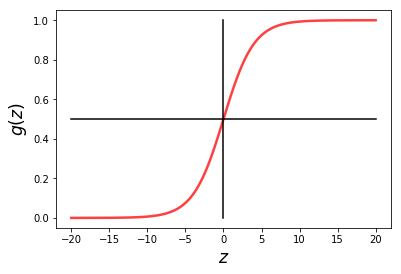

In [68]:
# generate 1000 samples between -20 and 20
x = np.linspace(-20, 20, 1000)
beta = [0, 0.5]
y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))

# Plotting
plt.plot(x, y, 'r', alpha=0.75, linewidth=2.5)
plt.plot([0,0], [0, 1], 'k')
plt.plot([-20,20], [0.5, 0.5], 'k')
plt.xlabel(r'$z$', fontsize='xx-large')
plt.ylabel(r'$g(z)$', fontsize='xx-large')

#playing with axis of plot
#plt.axis([-0.1,20.1,0.4,1.1])

print ('Figure 1. Logistic Function')


We can interpret $g(z)$  as the probability of positive classification. Values $>= 0.5$ are classified as positive (1: likely to default), and values $< 0.5$ are classified as negative (0: not likely to default).

### 3. Getting, preparing, and visualizing the data

In [69]:
# Read Default.csv into a DataFrame
d = pd.read_csv('Default.csv')
d.head()

,default,student,balance,income
0,0,No,729.526495,44361.62507
1,0,Yes,817.180407,12106.13470
2,0,No,1073.549164,31767.13895
3,0,No,529.250605,35704.49394
4,0,No,785.655883,38463.49588


In [70]:
d.describe()

,default,balance,income
count,10000.000000,10000.000000,10000.000000
mean,0.033300,835.374886,33516.981876
std,0.179428,483.714985,13336.639563
min,0.000000,0.000000,771.967729
25%,0.000000,481.731105,21340.462905
50%,0.000000,823.636973,34552.644800
75%,0.000000,1166.308387,43807.729275
max,1.000000,2654.322576,73554.233500


Prepare the data for classification

sklearn.model_selection.train_test_split(*arrays, **options):  
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [71]:
# Convert classification attribute to numeric binary value for binary classification

d.loc[d.student == 'Yes', 'student'] = 1
d.loc[d.student == 'No', 'student'] = 0

# Split the data into training and test sets
X = d[['balance','student','income']] #X is colums of dataset that are not not the predicted
y = d.default #Y is the predicted column from the dataset
print('X: ', type(X), X)
print('Y: ', type(y), y)
#then create the train data. sklearn.model_selection.test_train_split (random state is RNG seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

print(type(y_train))


# Convert the split data lists back into a DataFrame
train = pd.DataFrame(data=X_train, columns=['balance','student','income'])
train['default'] = y_train
test = pd.DataFrame(data=X_test, columns=['balance','student','income'])
test['default'] = y_test


X:  <class 'pandas.core.frame.DataFrame'>           balance  student        income
0      729.526495        0  44361.625070
1      817.180407        1  12106.134700
2     1073.549164        0  31767.138950
3      529.250605        0  35704.493940
4      785.655883        0  38463.495880
5      919.588530        1   7491.558572
6      825.513330        0  24905.226580
7      808.667504        1  17600.451340
8     1161.057854        0  37468.529290
9        0.000000        0  29275.268290
10       0.000000        1  21871.073090
11    1220.583753        1  13268.562220
12     237.045114        0  28251.695340
13     606.742343        0  44994.555850
14    1112.968401        0  23810.174050
15     286.232560        0  45042.413040
16       0.000000        0  50265.312350
17     527.540184        1  17636.539620
18     485.936864        0  61566.106120
19    1095.072735        0  26464.631390
20     228.952550        0  50500.182200
21     954.261793        0  32457.509080
22    1055.9566

Visualize the data

Figure 2. Histogram of all variables
Figure 2b. histogram of all variables in test below it


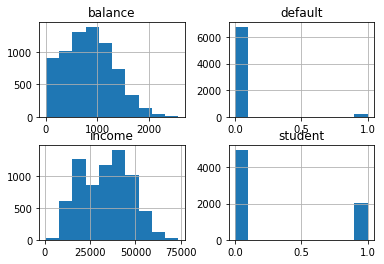

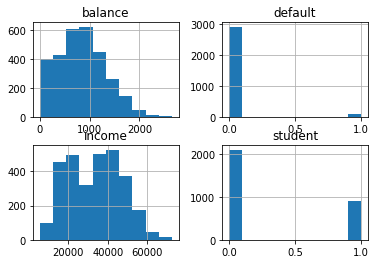

In [72]:
# Create a histogram of all variables
# Histograms show the distribution of each predictor variable
train.hist()
print('Figure 2. Histogram of all variables')
test.hist()
print('Figure 2b. histogram of all variables in test below it')


**Q0) Create a scatter plot of the income vs. balance** Answer in the cell below.

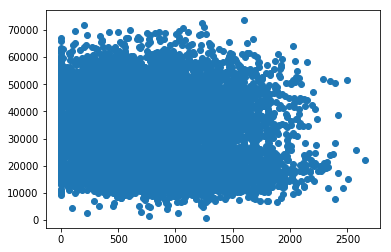

In [73]:
# Create a scatter plot of the income vs. balance
# Scatterplots are useful for visualizing the association between two variables

# your work here
#plt.scatter(d['income'],d['balance'])
plt.scatter(d['balance'],d['income']) #to better match below picture 
#(at first i didn't believe they were the same picture)

Text(0.5,1,'Figure 4. Scatterplot of incomve vs. balance - default, non-default')

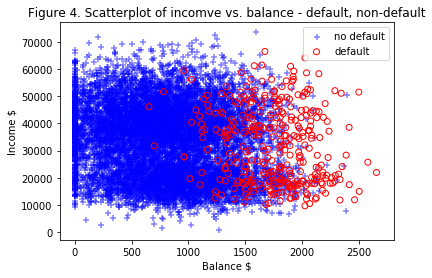

In [74]:
# We can mark defaults (cassification attribute) with a different color and symbol
train_nd = d[d.default == 0] #no defaulted people
train_d = d[d.default == 1] #defaulted people

plt.figure()

plt.scatter(train_nd.balance, train_nd.income, alpha = .5, marker='+', c= 'b') #blue pluses (note marker)

plt.scatter(train_d.balance, train_d.income, marker='o', 
            edgecolors = 'r', facecolors = 'none') #red o's (note facecolor & edgecolor)

plt.legend( ('no default', 'default'), loc='upper right')

plt.xlabel("Balance $")
plt.ylabel("Income $")

plt.title ('Figure 4. Scatterplot of incomve vs. balance - default, non-default')


##### Can you identfy an income threshold for default vs. non-default? If so, what is it?

I do not think there is an income threshold for default vs non-default. 
I think this because on the y axis of the plot there is no distint separation between default and no default. In other words, I cannot draw a horizontal line to separate the groupings of +'s and o's. 

##### Can you identfy a balance threshold for default vs. non-default? If so, what is it?

A balance threshold for default vs non-default can be defined. It 

##### Which individual attribute, i.e., income or balance is likely to be the more accurate predictor? 





**Q1) What precentage of individuals in the dataset default?** Answer in the cell below.

In [77]:
numdefault = d[d.default == 1].count()
#print('num default\n',numdefault)

num_nodefault = d[d.default == 0].count()
#print('num nodefault\n',num_nodefault)

print('percentage of default individuals \n', numdefault/num_nodefault['default'] * 100)

percentage of default individuals 
 default    3.444709
student    3.444709
balance    3.444709
income     3.444709
dtype: float64


In [104]:
#second implementation
d.groupby('default').count()

#third try
x = d['default'].value_counts()
print('Percentage of individuals who default: %.2f%%' %(x[1]/x[0] * 100))

Percentage of individuals who default: 3.44%


**Q2) From 'Figure 4. Scatterplot of income vs. balance - default, non-default':**

Can you identfy an income threshold for default vs. non-default? If so, what is it?

Can you identfy a balance threshold for default vs. non-default? If so, what is it?

Which individual attribute, i.e., income or balance is likely to be the more accurate predictor? 

Provide your answers in the cell below.


### 4. Logistic Regression classification

In [ ]:
# Fit (learn) a logistic regression model on the balance variable
balance = LogisticRegression()
balance.fit(train[['balance']], y_train)

# Is the beta_1 value associated with balance significant?
B1 = balance.coef_[0][0]
B0 = balance.intercept_[0]
print ('B1: ', B1, ' B0: ', B0)
print ('e^B1: ', np.exp(B1))



$\beta_1$ is significant.

Logistic function: $\dfrac{g(z)}{1-g(z)} = \dfrac{e^{\beta_0+\beta_1x}}{1-e^{\beta_0+\beta_1x}}$

The log-odds can be defined as the log odds of positive classification:

log odds = $log\big(\dfrac{e^{\beta_0+\beta_1x}}{1-e^{\beta_0+\beta_1x}}\big) = \beta_0+\beta_1x$

Increasing $X$ by one unit changes the log odds by $\beta_1$, or equivalently 
it multiplies the odds by $e^{\beta_1}$. 

Because the relationship between $f(X)$ and $X$ is not a straight line, $\beta_1$ does not correspond to the change 
in $f(X)$ associated with a one-unit increase in $X$. The amount that 
$f(X)$ changes due to a one-unit change in $X$ will depend on the current 
value of $X$.

In our example, ${\beta_1} ~= 0.0043$

Log-odds: 
If you increase $x$ by 1, you increase the log-odds by $0.0043*1$. 
If you increase $x$ by 800, you increase the log-odds by 0.0043*800 = 3.44

To get the change in $f(X)$, if you increase $x$ by 1, you multiply the odds by $e^{0.0043}$. 
If you increase $x$ by 800, you mutliply the odds by $e^{0.0043*800} = 31.187$, not $800 * e^{0.0043}$

[Log-odds](https://en.wikipedia.org/wiki/Logit)

Prediction using the *balance* variable

In [ ]:
# Predict the probability of default for someone with a balance of $1.2k and $2.5k
prob = balance.predict(pd.DataFrame({'balance': [1200, 2500]}))

# What does beta mean? Every unit increase in balance corresponds to a beta increase in y. 
x = np.linspace(test.balance.min(), test.balance.max(),500)
beta = [B0,B1]

y = np.exp(beta[0] + beta[1]*x) / (1 + np.exp(beta[0] + beta[1]*x))
odds = np.exp(beta[0] + beta[1]*x)
log_odds = beta[0] + beta[1]*x

plt.figure(figsize=(7, 8))
plt.subplot(311)
plt.plot(x, y, 'r', linewidth=2)
plt.ylabel('Probability')
plt.text(500, 0.7, r'$\frac{e^{\beta_o + \beta_1x}}{1+e^{\beta_o + \beta_1x}}$', fontsize=25)

plt.subplot(312)
plt.plot(x, odds, 'k', linewidth=2)
plt.ylabel('Odds')
plt.text(500, 10, r'$e^{\beta_o + \beta_1x}$', fontsize=20)

plt.subplot(313)
plt.plot(x, log_odds, 'c', linewidth=2)
plt.ylabel('Log(Odds)')
plt.xlabel('x')
plt.text(500, 1, r'$\beta_o + \beta_1x$', fontsize=15)
print ('Figure 5. Probability, Odds, and Log(odds) of balance - default, non-default')


In [ ]:
# Plot the fitted logistic function overtop of the data points
plt.figure()
plt.scatter(test.balance, test.default, alpha=0.1)
plt.plot(x, y, 'r', linewidth=2)
plt.xlabel("Balance")
plt.ylabel("Probability of Default")
plt.ylim([-0.05,1.05]); plt.xlim([0, 2800])
plt.plot([1200, 2500], prob, 'ko')
print ('Figure 6. The fitted logistic model for predicting default from balance')


### 5. Evaluating the model on the training data

Accuracy measures the overall correctness of classification. 

Accuracy = $\dfrac{TP+TN}{TP+TN+FP+FN}$

Sensitivity (also called the true positive rate, or recall) measures the proportion of positives that are correctly identified as such. E.g., people who have cancer.

Sensitivity = $\dfrac{TP}{TP+FN}$

Specificity (also called the true negative rate) measures the proportion of negatives that are correctly identified as such. E.g., people who do not have cancer.

Specificity = $\dfrac{TN}{TN+FP}$

[Sensititivy and specificity](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)

In [ ]:
# Create predictions using the balance model on the test set
test['pred_class'] = balance.predict(test[['balance']])

# Accuracy
accuracy = sum(test.pred_class == test.default) / float(len(test.default))
print ('Accuracy: ', accuracy)

# Sensitivity
# For those who did default, how many did it predict correctly? 
test_d = test[test.default == 1]
sensitivity = sum(test_d.pred_class == test_d.default) / float(len(test_d.default))
print ('Sensitivity: ', sensitivity)

# Specificity
# For those who didn't default, how many did it predict correctly?
test_nd = test[test.default == 0]
specificity = sum(test_nd.pred_class == test_nd.default) / float(len(test_nd.default))
print ('Specificity: ', specificity)


Class imbalance can result in accuracy measures that are missleading. How does our overall classification accuracy compare to the non-default rate?

In [ ]:
null = 1 - sum(d.default) / float(len(d.default))
print ('Classification accuracy vs. non-default rate: ', null)



What this means is that you could have just guessed not going to default, and would be correct 96.67% of the time.

### 6. Multivariate Logistic Regression

In [ ]:
# Fit (learn) a logistic regression model on the balance variable
balance_student = LogisticRegression()
balance_student.fit(train[['balance','student']], y_train)

B2 = balance_student.coef_[0][1]
B1 = balance_student.coef_[0][0]
B0 = balance_student.intercept_[0]
print ('B0: ', B0, 'B1: ', B1, 'B2: ', B2)



**Q3) For a given income level, who are more likely to default, students or non-students?**

*Hint: look at the value of the coefficients for the balance_student model created in Step 6. $B0$ is the intercept, $B1$ is the coefficent for income, and $B2$ is the coefficient for student (1=student). Think about the meaning of the coefficients.*


**Q4) Which combination of predictors: student, balance, or income has the highest predictive accuracy?**

To answer this question, we will use a feature selection technique called forward selection.

- Build 3 separate models for each predictor using the 70/30 split training/test set created above. See *step 6, Multivariate Logisitc Regression* for an example. Of the three, select the most predicitve univariate model. For example, income.

- Next build 2 models: income+balance, and income+student. If neither of these models perform better than the previous income model, stop.

- Else build 1 model with all three predictors. 

Show your work, and summarize your results.


### 7. Summary for applying Logistic Regression with scikit-learn

Create LogisticRegression model:

*model = LogisticRegression()*

Fit a model to our data:

*model.fit(X,Y)*

Check our accuracy:

*model.score(X,Y)*